<a href="https://colab.research.google.com/github/faizan-abbas-mir/TSD/blob/main/ARIMA%2BSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

In [126]:
df_airline= pd.read_csv('AirPassengers.csv')
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [77]:
df_airline.isnull().sum()

,0
Month,0
#Passengers,0


In [125]:
df_airline.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [124]:
df_airline.dropna(axis=1,inplace=True)
df_airline

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [80]:
 df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [81]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [82]:
df_airline.set_index('Month',inplace=True)

In [83]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

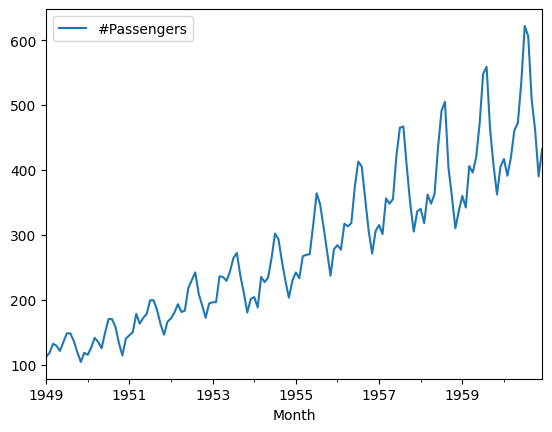

In [84]:
df_airline.plot()

here da6ta is seasional

In [85]:
from statsmodels.tsa.stattools import adfuller

In [86]:
def adf_test(series):
  result= adfuller(series)
  print('ADF statistics:{}'.format(result[0]))
  print('P value:{}'.format (result[1]))
  if result[1]<=0.05:
    print('Reject null hypothesis')
  else:
    print('Fail to reject null hypothesis, not stationay')

In [87]:
adf_test(df_airline)

ADF statistics:0.8153688792060498
P value:0.991880243437641
Fail to reject null hypothesis, not stationay


In [88]:
df_airline['passenger first difference']=df_airline['#Passengers']- df_airline['#Passengers'].shift(1)

In [89]:
df_airline['passenger first difference']

,passenger first difference
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [90]:
adf_test(df_airline['passenger first difference'].dropna())

ADF statistics:-2.8292668241700047
P value:0.05421329028382478
Fail to reject null hypothesis, not stationay


In [91]:
df_airline['passenger second difference']=df_airline['passenger first difference']- df_airline['passenger first difference'].shift(1)

In [92]:
adf_test(df_airline['passenger second difference'].dropna())

ADF statistics:-16.384231542468513
P value:2.7328918500142026e-29
Reject null hypothesis


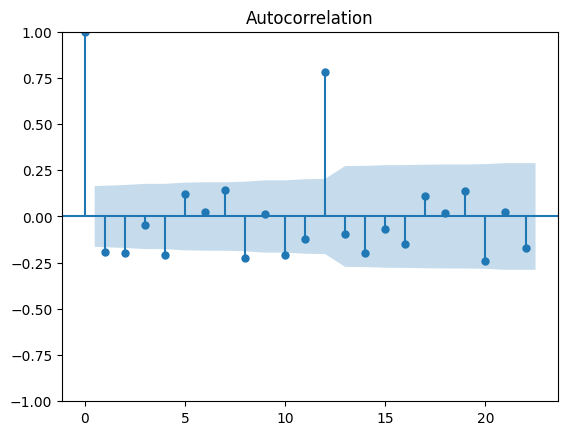

In [93]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf= plot_acf(df_airline['passenger second difference'].dropna())

In [94]:
### 12 time difference wil;l be done as it is seasonal data for 12 months
df_airline['passenger 12 difference']=df_airline['#Passengers']- df_airline['#Passengers'].shift(12)

In [95]:
adf_test(df_airline['passenger 12 difference'].dropna())

ADF statistics:-3.383020726492481
P value:0.011551493085514952
Reject null hypothesis


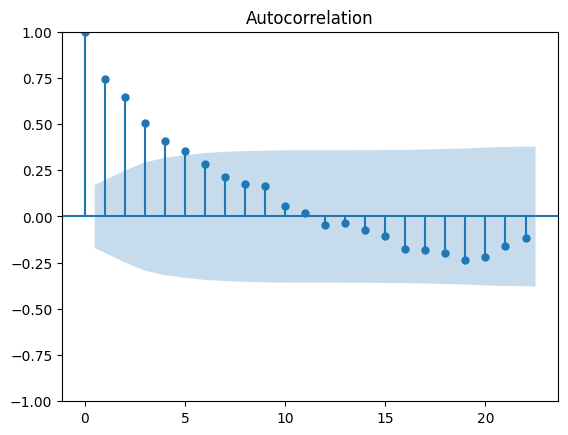

In [96]:
acf = plot_acf(df_airline['passenger 12 difference'].dropna())

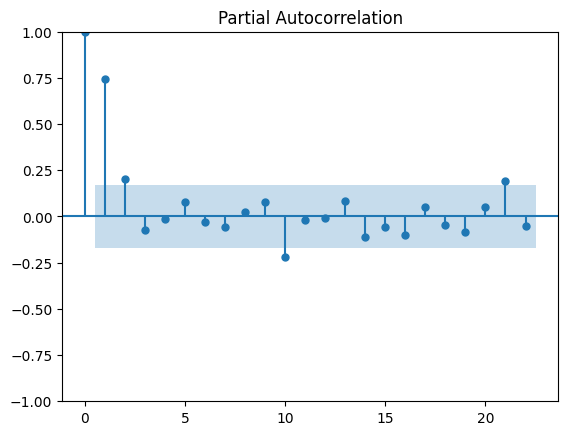

In [97]:
pacf12= plot_pacf(df_airline['passenger 12 difference'].dropna())

In [98]:
df_airline

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [99]:
from datetime import datetime,timedelta
train_dataset_end= datetime(1955,12,1)
test_dataset_end= datetime(1960,12,1)

In [100]:
train_data= df_airline[:train_dataset_end]
test_data= df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]




In [101]:
  from statsmodels.tsa.arima.model import ARIMA

In [127]:
model_arima= ARIMA(train_data['passenger second difference'],order=(12,2,0))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [128]:
model_arima_fit= model_arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [129]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:     passenger second difference   No. Observations:                   84
Model:                         ARIMA(12, 2, 0)   Log Likelihood                -360.314
Date:                         Wed, 06 Aug 2025   AIC                            746.627
Time:                                 16:09:44   BIC                            777.915
Sample:                             01-01-1949   HQIC                           759.189
                                  - 12-01-1955                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8539      0.123    -15.023      0.000      -2.096      -1.612
ar.L2         -2.1384      0.256     -8.345      0.000      -2.641      -1.636
ar.L3         -2.2868      0.396     -5.773      0.000      -3.063      -1.510
ar.L4         -2.3681      0.506     -4.676      0.000      -3.361      -1.376
ar.L5         -2.2827      0.578     -3.951      0.000      -3.415      -1.150
ar.L6         -2.1583      0.624     -3.459      0.001      -3.381      -0.935
ar.L7         -1.9100      0.642     -2.976      0.003      -3.168      -0.652
ar.L8         -1.7766      0.625     -2.840      0.005      -3.003      -0.551
ar.L9         -1.5794      0.557     -2.837      0.005      -2.670      -0.488
ar.L10        -1.5078      0.455     -3.315      0.001      -2.399      -0.616
ar.L11        -1.4337      0.299     -4.795      0.000      -2.020      -0.848
ar.L12        -0.6693      0.139     -4.806      0.000      -0.942      -0.396
sigma2       268.5303     56.522      4.751      0.000     157.749     379.311
===================================================================================
Ljung-Box (L1) (Q):                   2.70   Jarque-Bera (JB):                 4.49
Prob(Q):                              0.10   Prob(JB):                         0.11
Heteroskedasticity (H):               2.12   Skew:                            -0.37
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date,pred_end_date)

1956-01-01 00:00:00 1960-12-01 00:00:00


In [132]:

pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['passenger second difference']-pred

In [133]:
pred

,predicted_mean
1956-01-01,-19.028722
1956-02-01,-13.258398
1956-03-01,31.406582
1956-04-01,-11.649834
1956-05-01,-3.194339
1956-06-01,55.675011
1956-07-01,14.566038
1956-08-01,-48.969279
1956-09-01,4.346094
1956-10-01,15.691404


In [134]:
residuals

,0
Month,
1956-01-01,-15.971278
1956-02-01,0.258398
1956-03-01,15.593418
1956-04-01,-32.350166
1956-05-01,12.194339
1956-06-01,-4.675011
1956-07-01,-31.566038
1956-08-01,1.969279
1956-09-01,-46.346094


<Axes: ylabel='Density'>

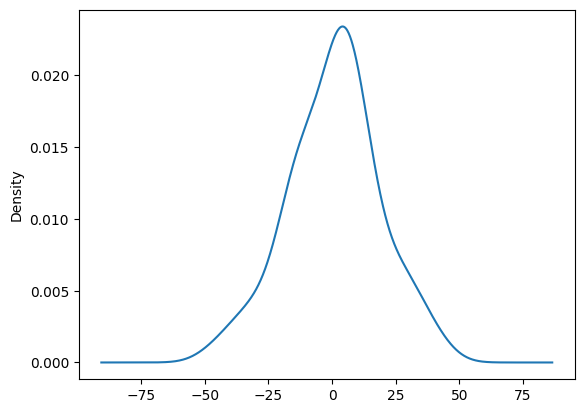

In [135]:
model_arima_fit.resid.plot(kind='kde')

In [136]:
test_data['Predicted_ARIMA']=pred

/tmp/ipython-input-95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


In [137]:
test_data

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,-19.028722,287.833552
1956-02-01,277,-7.0,-13.0,44.0,-13.258398,278.411435
1956-03-01,317,40.0,47.0,50.0,31.406582,309.874781
1956-04-01,313,-4.0,-44.0,44.0,-11.649834,308.931716
1956-05-01,318,5.0,9.0,48.0,-3.194339,306.633035
1956-06-01,374,56.0,51.0,59.0,55.675011,346.427888
1956-07-01,413,39.0,-17.0,49.0,14.566038,386.802744
1956-08-01,405,-8.0,-47.0,58.0,-48.969279,371.096255
1956-09-01,355,-50.0,-42.0,43.0,4.346094,341.539826


<Axes: xlabel='Month'>

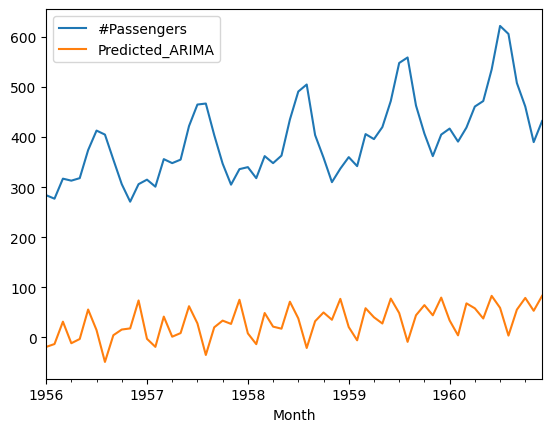

In [138]:
 test_data[['#Passengers','Predicted_ARIMA']].plot()

In [140]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [114]:
model_SARIMA= SARIMAX(train_data['#Passengers'],order=(3,0,5),seasonal_order=(1,0,1,12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [141]:
model_SARIMA_fit= model_SARIMA.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [142]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 0, [1], 12)   Log Likelihood                -319.701
Date:                              Wed, 06 Aug 2025   AIC                            661.403
Time:                                      16:10:57   BIC                            688.142
Sample:                                  01-01-1949   HQIC                           672.152
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0367      0.248      0.148      0.883      -0.450       0.524
ar.L2          0.0845      0.282      0.300      0.765      -0.468       0.637
ar.L3          0.8595      0.274      3.138      0.002       0.323       1.396
ma.L1          0.8121      0.276      2.944      0.003       0.271       1.353
ma.L2          0.7440      0.319      2.332      0.020       0.119       1.369
ma.L3         -0.3945      0.195     -2.022      0.043      -0.777      -0.012
ma.L4         -0.3367      0.185     -1.817      0.069      -0.700       0.027
ma.L5         -0.3293      0.137     -2.409      0.016      -0.597      -0.061
ar.S.L12       0.9418      0.062     15.110      0.000       0.820       1.064
ma.S.L12      -0.2704      0.189     -1.434      0.151      -0.640       0.099
sigma2        83.7303     17.201      4.868      0.000      50.017     117.443
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.01
Prob(Q):                              0.78   Prob(JB):                         0.13
Heteroskedasticity (H):               2.98   Skew:                             0.53
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [143]:
test_data.tail()

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1960-08-01,606,-16.0,-103.0,47.0,3.646011,437.258545
1960-09-01,508,-98.0,-82.0,45.0,55.403105,413.710271
1960-10-01,461,-47.0,51.0,54.0,78.823986,385.987553
1960-11-01,390,-71.0,-24.0,28.0,53.170908,358.078549
1960-12-01,432,42.0,113.0,27.0,82.958157,385.614969


In [145]:
pred_Sarima= model_SARIMA_fit.predict(start= pred_start_date, end= pred_end_date)
residuals= test_data['passenger second difference']-pred_Sarima

<Axes: xlabel='Month'>

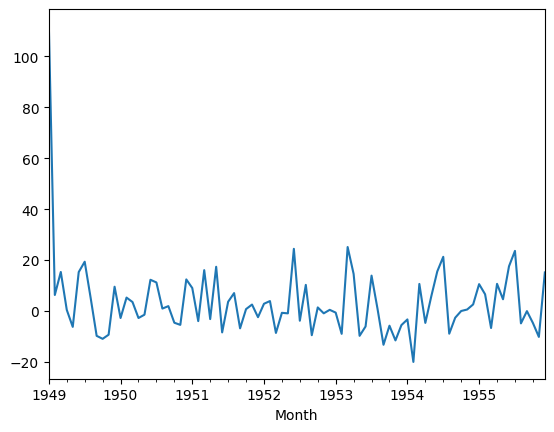

In [146]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

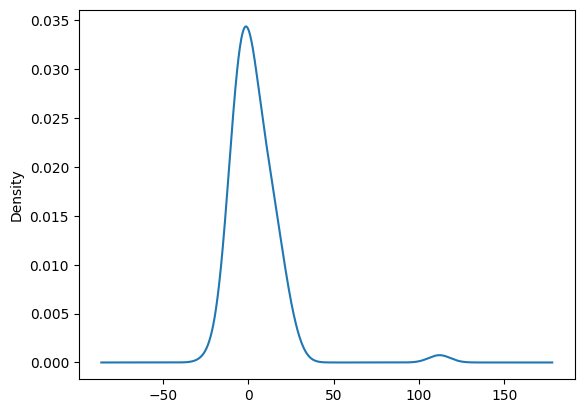

In [147]:
model_SARIMA_fit.resid.plot(kind='kde')

In [148]:
test_data['Predicted_SARIMA']=pred_Sarima

/tmp/ipython-input-1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [149]:
test_data

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,-19.028722,287.833552
1956-02-01,277,-7.0,-13.0,44.0,-13.258398,278.411435
1956-03-01,317,40.0,47.0,50.0,31.406582,309.874781
1956-04-01,313,-4.0,-44.0,44.0,-11.649834,308.931716
1956-05-01,318,5.0,9.0,48.0,-3.194339,306.633035
1956-06-01,374,56.0,51.0,59.0,55.675011,346.427888
1956-07-01,413,39.0,-17.0,49.0,14.566038,386.802744
1956-08-01,405,-8.0,-47.0,58.0,-48.969279,371.096255
1956-09-01,355,-50.0,-42.0,43.0,4.346094,341.539826


<Axes: xlabel='Month'>

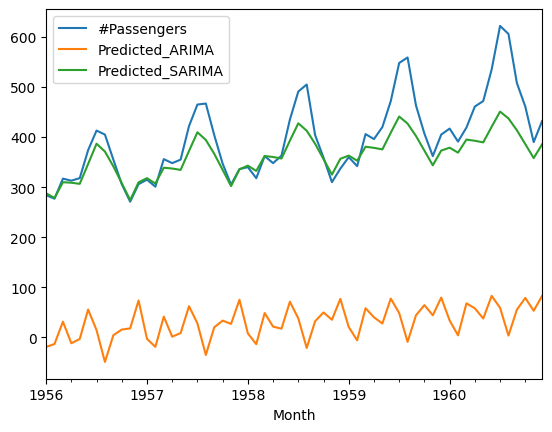

In [150]:
test_data[['#Passengers','Predicted_ARIMA','Predicted_SARIMA']].plot()